<Figure size 432x288 with 0 Axes>

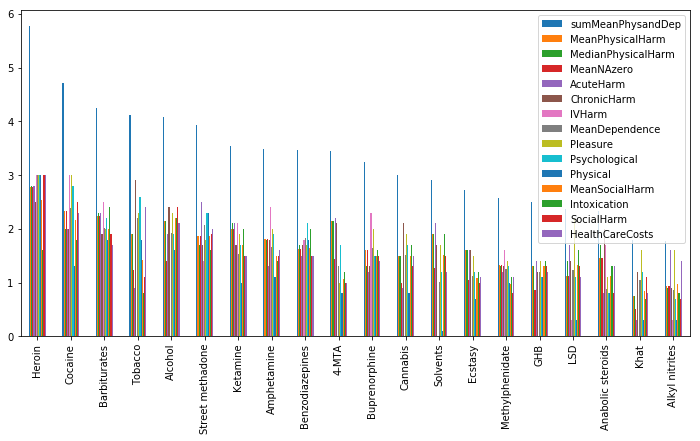

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
col_names=['sumMeanPhysandDep','MeanPhysicalHarm','MedianPhysicalHarm','MeanNAzero','AcuteHarm',
           'ChronicHarm','IVHarm','MeanDependence','Pleasure','Psychological','Physical',
           'MeanSocialHarm','Intoxication','SocialHarm','HealthCareCosts']
df =  pd.read_excel('/Users/michaelwest/Documents/drugharmdependence/data.xlsx',names=col_names,
               index_col=0,)
#print(df)
#sns.pairplot(df, vars=['MeanPhysicalHarm','MeanDependence'])
#sns.distplot(df.ChronicHarm,df.MeanPhysicalHarm,df)
plt.figure()
df.plot.bar(figsize=[12,6])


